In [1]:
#Day 5 - code 
class Error(Exception):
    """Base class for other exceptions"""
    pass
class Error_incorrectinput(Error):
    """Raised when the input value is too small"""
    pass
def check_country(ctry_list, key_list, num_ctry):
    #check that the countries entered are correct and number of entered countries is correct
    err_m = []
    err_flag = False
    if len(ctry_list) > num_ctry:
        err_msg.append("Enter upto three countries only")
        err_flag = True
    elif len(ctry_list) <2:
        err_msg.append("Enter at least 2 countries")
        err_flag = True
    for x in range(len(ctry_list)):
        if ctry_list[x] not in key_list:
            temp = f"Country {ctry_list[x]} does not exist in the data. Please check spelling"
            #print (temp)
            #print(err_m)
            err_m.append(temp)
            err_flag = True
    return err_m, err_flag

#working code Day 1
import csv
co2datadict = {}
with open("Emissions.csv") as csvfile:
    co2data = csv.reader(csvfile)
    for item in co2data:
        for x in item:
            co2datadict[item[0]] = item[1:]
#for x in co2datadict:
#    print(x, " - ", co2datadict[x])


In [2]:
#Day 2
print ("All the data from dictionary has been read into a dictionary")

All the data from dictionary has been read into a dictionary


In [3]:
while True:
    try:
        yr = int(input("Select an year to find the statistics (1997 - 2010): "))
        assert yr in range(1997,2011)
    except ValueError:
        print ("Not a number. Try again")
        continue
    except:
        print ("Year value has to be from 1997 - 2010")
        continue
    else:
        break
        
    

Select an year to find the statistics (1997 - 2010): 1997


In [4]:
yr_idx = co2datadict["CO2 per capita"].index(str(yr))

In [5]:
yr_co2_val = []
#yr_co2_max = 0.0
#yr_co2_min = 0.0
for item in co2datadict:
    if item != "CO2 per capita":
       # print (item)
        yr_co2_val.append(float(co2datadict[item][yr_idx]))
        max_co2 = max(yr_co2_val)
        min_co2 = min(yr_co2_val) 
        if float(co2datadict[item][yr_idx]) >= max_co2:
            yr_co2_max = item
        elif float(co2datadict[item][yr_idx]) <= min_co2:
            yr_co2_min = item
max_co2 = max(yr_co2_val)
min_co2 = min(yr_co2_val)
mean_co2 = round(sum(yr_co2_val)/len(yr_co2_val),6)
print (max_co2," , ", min_co2)
print (f"In {yr}, countries with minimum and maximum CO2 emission levels were: {yr_co2_max} and {yr_co2_min} respectively.")
print (f"Average co2 emissions in 1997 were {mean_co2}")

68.61994212  ,  0.015260169
In 1997, countries with minimum and maximum CO2 emission levels were: Qatar and Chad respectively.
Average co2 emissions in 1997 were 4.958985


In [6]:
#Day 3: Plot the emissions data from a user-selected country. Use Python plotting library matplotlib for drawing the plots
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

In [7]:
co2df = pd.DataFrame(co2datadict)

In [ ]:
co2df

In [8]:
co2df.set_index("CO2 per capita").head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,West Bank and Gaza,Western Sahara,Vietnam,Zambia,Zimbabwe
CO2 per capita,,,,,,,,,,,,,,,,,,,,,
1997,0.052333365,0.499261188,3.015670427,7.061602855,0.576990561,4.664325286,3.770570751,1.045668737,21.74312968,18.00758857,...,19.87559408,1.699139969,4.28482617,0.503084249,5.833523973,0.139027419,0.798044067,0.592506586,0.25383693,1.191934033
1998,0.048546686,0.569225594,3.608257648,7.533542944,0.556212458,4.497461473,3.80967752,1.095600733,19.21445326,18.51527047,...,19.76765214,1.72843431,4.872490824,0.473926547,7.142414583,0.202052038,0.783195953,0.616837131,0.238964347,1.162341642
1999,0.037446034,0.971341941,3.060244617,8.022713657,0.677616537,4.584238117,3.981141308,0.989444203,19.02942041,17.1783559,...,19.8037525,2.033286064,4.798243774,0.465315596,7.225967549,0.209712636,0.786200396,0.612249535,0.18176428,1.276289034
2000,0.034170007,0.983553048,2.879527679,8.112345412,0.68507907,4.438377803,3.819693795,1.126427051,24.73662638,17.19727773,...,20.22341689,1.59854208,4.841064795,0.435861691,6.259217617,0.247611425,0.755797975,0.68106935,0.178273353,1.110011767
2001,0.027255262,1.047320154,2.720453311,7.897775769,0.676339193,4.353775869,3.555285353,1.155322737,24.21604611,16.7592018,...,19.61477176,1.530714036,4.872775736,0.464272148,6.953024135,0.410765965,0.707728794,0.767733041,0.182459196,0.998965011


In [ ]:
co2df.columns

Select the country to visualize: India


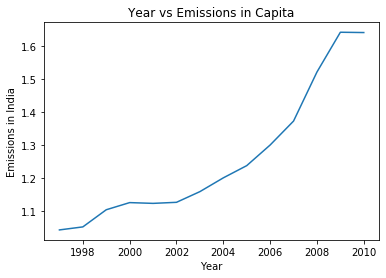

In [9]:
#method 1: with pandas
while True:
    try:
        cntry = input("Select the country to visualize: ")
        #check if country exists in the data
        assert cntry.title() in co2df.columns
    except:
        print (f"Country {cntry} does not exist in the data. Please check spelling")
        continue
    else:
        break
x = list(int(item) for item in co2df["CO2 per capita"])
y = list(float(item) for item in co2df[cntry.title()])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x,y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.set_xlabel("Year")
ax.set_ylabel(f"Emissions in {cntry.title()}")
ax.set_title("Year vs Emissions in Capita")
plt.show()

Select the country to visualize: India


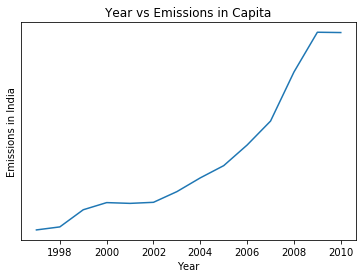

In [10]:
#method 2: without pandas
while True:
    try:
        cntry = input("Select the country to visualize: ")
        #check if country exists in the data
        assert cntry.title() in co2datadict.keys()
    except:
        print (f"Country {cntry} does not exist in the data. Please check spelling")
        continue
    else:
        break
x = list(int(item) for item in co2datadict["CO2 per capita"])
y = list(float(item) for item in co2datadict[cntry.title()])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x,y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax.set_xlabel("Year")
ax.set_ylabel(f"Emissions in {cntry.title()}")
ax.set_title("Year vs Emissions in Capita")
plt.show()

In [11]:
#Day 4 - plot a comparison graph based on user input
ctry = []
while True:
    try:
        temp = input("Select the first country to visualize: ")
        #check if country exists in the data
        assert temp.title() in co2datadict.keys()
    except:
        print (f"Country {temp} does not exist in the data. Please check spelling")
        continue
    else:
        ctry.append(temp)
        break
while True:
    try:
        temp = input("Select the second country to visualize: ")
        #check if country exists in the data
        assert temp.title() in co2datadict.keys()
    except:
        print (f"Country {temp} does not exist in the data. Please check spelling")
        continue
    else:
        ctry.append(temp)
        break
x = list(int(item) for item in co2datadict["CO2 per capita"])
y = []

for c in range(len(ctry)):
    print (c)
    temp = list(float(item) for item in co2datadict[ctry[c].title()])
    y.append(temp)
    print (y[c])
    


Select the first country to visualize: Mongolia
Select the second country to visualize: MOntenegro
0
[3.28740656, 3.256305554, 3.161896055, 3.112616388, 3.238153527, 3.370135045, 3.232633598, 3.400594905, 3.39413011, 3.674977223, 3.84478265, 3.759486815, 4.075487859, 4.176220062]
1
[3.371343904, 3.565346706, 2.473520616, 2.760902833, 2.977457077, 3.191799135, 3.418872403, 3.739135948, 3.539748704, 3.800721021, 3.585142625, 4.370733568, 2.890596704, 4.087686794]


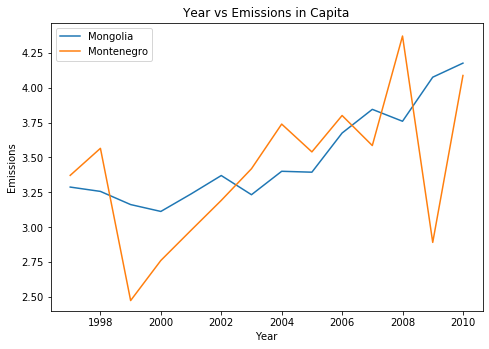

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#ax.plot(x,y[0])
for c in range(len(y)):
    ax.plot(x,y[c],label = ctry[c].title())
    
#ax.set_xlim(left = 0)
ax.set_ylim(bottom = 2.4)
ax.set_xlabel("Year")
ax.set_ylabel("Emissions")
ax.set_title("Year vs Emissions in Capita")
ax.legend(loc =0)
plt.show()

In [14]:
#Day 5 - 
#1. extract data for up to three user-selected countries and save it to a new file Emissions_subset.csv
#2. The new file should have the exact same format as the source file, i.e. first line of headers and...
#...then up to 3 lines for selected countries

#method 1: without pandas    
ctry_list = []
while True:
    try:
        e_flag = False
        e_msg = []
        temp = input("Write upto three comma separated countries for which you want to extract data: ").split(",")
        ctry_list = list(map(str.strip, temp))
        #check if country exists in the data
        e_msg, e_flag = check_country(ctry_list, co2datadict.keys(), 3)
        if e_flag:
            raise Error_incorrectinput #userdefined error

        
    except Error_incorrectinput:
        for item in e_msg:
            print (item)
        continue
    else:
        break


Write upto three comma separated countries for which you want to extract data: Australia, Austria, Ch
Country Ch does not exist in the data. Please check spelling
Write upto three comma separated countries for which you want to extract data: Australia, Austria, Azerbaijan


In [17]:
with open("Emissions_subset.csv","w", newline = "") as file:
    writer = csv.writer(file)
    rw=[]
    rw.append("CO2 per capita")
    for item in co2datadict["CO2 per capita"]:
        rw.append(item)
    writer.writerow(rw)
    rw=[]
    for item in ctry_list:
        rw=[]
        rw.append(item)
        for val in co2datadict[item]:
            rw.append(val)
        writer.writerow(rw)

In [22]:
with open("Emissions_subset.csv") as csvfile:
    co2data = csv.reader(csvfile)
    for item in co2data:
        print (item)

['CO2 per capita', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']
['Australia', '18.00758857', '18.51527047', '17.1783559', '17.19727773', '16.7592018', '17.39286776', '17.46183995', '17.34623728', '17.7739756', '17.89312837', '17.85990598', '18.01631327', '18.03726854', '16.75230078']
['Austria', '8.015418493', '8.219538404', '7.989368994', '7.956563584', '8.174472454', '8.310385132', '8.889629244', '8.77880008', '9.017237523', '8.6494461', '8.319711838', '8.183160018', '7.438353474', '7.969244347']
['Azerbaijan', '3.766425751', '3.97117158', '3.55432571', '3.637859001', '3.512029921', '3.576219661', '3.654527368', '3.783992486', '3.998027302', '4.500681609', '4.695870874', '5.109538292', '4.701319259', '4.976935132']


In [26]:
#method 2: with pandas- 23/06 hasn't worked

co2df_t = co2df.set_index("CO2 per capita").transpose()
co2df_t.head()

CO2 per capita,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Afghanistan,0.052333365,0.048546686,0.037446034,0.034170007,0.027255262,0.014583427,0.022703695,0.02747237,0.036779904,0.047089636,0.068311633,0.131601903,0.213325007,0.262173714
Albania,0.499261188,0.569225594,0.971341941,0.983553048,1.047320154,1.214003077,1.382066271,1.332965957,1.353788699,1.224310364,1.27942017,1.297752738,1.215054777,1.336544035
Algeria,3.015670427,3.608257648,3.060244617,2.879527679,2.720453311,2.889312783,2.899236274,2.762219639,3.257009779,3.113135178,3.312874684,3.328944661,3.564360549,3.480976541
Andorra,7.061602855,7.533542944,8.022713657,8.112345412,7.897775769,7.700515138,7.414281032,7.499690095,7.390954533,6.839939571,6.622435189,6.527241242,6.178519784,6.092100302
Angola,0.576990561,0.556212458,0.677616537,0.68507907,0.676339193,0.850521392,0.587810214,1.177610138,1.161661852,1.308848969,1.435043652,1.474353388,1.500053579,1.593917842


In [28]:
for item in ctry_list:
    co2df_t.loc[item].to_csv("Emissions_subset2.csv")

In [29]:
with open("Emissions_subset2.csv") as csvfile:
    co2data = csv.reader(csvfile)
    for item in co2data:
        print (item)

['CO2 per capita', 'Azerbaijan']
['1997', '3.766425751']
['1998', '3.97117158']
['1999', '3.55432571']
['2000', '3.637859001']
['2001', '3.512029921']
['2002', '3.576219661']
['2003', '3.654527368']
['2004', '3.783992486']
['2005', '3.998027302']
['2006', '4.500681609']
['2007', '4.695870874']
['2008', '5.109538292']
['2009', '4.701319259']
['2010', '4.976935132']


In [ ]:
#Day 6: Error handling - already implemented in day 4 and 5